In [2]:
from create_time_evolution_adapted import (
    create_time_normalization_xr,
    convert_xr_to_nc,
    plot_time_norm,
)
import xarray as xr

import pandas as pd
import numpy as np

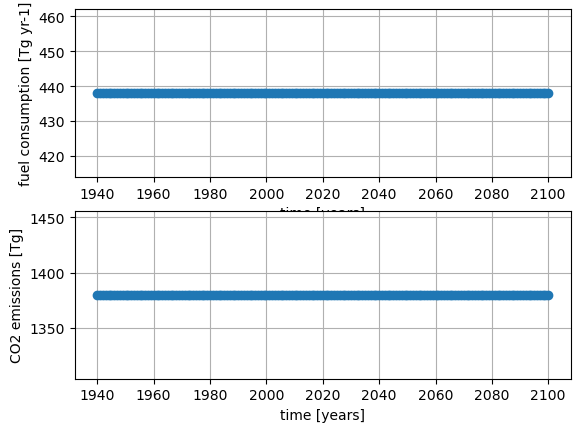

In [2]:
# make an evolution for a constant emission equal to the 2017 value, as there values for all scenarios are the same
NORM_TIME = np.arange(1940,2101,1)
fuel_2017 = 4.38E+11 #kg
nox_emis_2017 = 6.26E+09 #kg
co2_emis_2017 = 1.38E+12 #kg
distance_2017 = 9.39E+10 #km


FUEL_ARR = np.ones(len(NORM_TIME)) * fuel_2017 / 1e9
EI_CO2_ARR = np.ones(len(NORM_TIME)) * co2_emis_2017/ 1e9 / FUEL_ARR
EI_H2O_ARR = 1.25 * np.ones(
    len(NORM_TIME), dtype="float32"
)  # TODO H2O not defined by Grewe scenarios
EI_NOx_ARR = np.ones(len(NORM_TIME)) * nox_emis_2017/1e9 / FUEL_ARR
DIS_PER_FUEL_ARR = np.ones(len(NORM_TIME)) * distance_2017 / FUEL_ARR / 1e9

norm_ds = create_time_normalization_xr(
    time_arr=NORM_TIME,
    fuel_arr=FUEL_ARR,
    ei_co2_arr=EI_CO2_ARR,
    ei_h2o_arr=EI_H2O_ARR,
    ei_nox_arr=EI_NOx_ARR,
    dis_per_fuel_arr=DIS_PER_FUEL_ARR,
)
convert_xr_to_nc(
    norm_ds, 'constant_2017' + "_evo", "../Scenario_Analysis/evolution/"
)
plot_time_norm(norm_ds)

In [3]:
path_2017 = r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\Scenario_Analysis\evolution\constant_2017_evo.nc"
ds = xr.load_dataset(path_2017)
ds

<xarray.Dataset> Size: 7kB
Dimensions:       (time: 161)
Coordinates:
  * time          (time) int64 1kB 1940 1941 1942 1943 ... 2097 2098 2099 2100
Data variables:
    fuel          (time) float64 1kB 438.0 438.0 438.0 ... 438.0 438.0 438.0
    EI_CO2        (time) float64 1kB 3.151 3.151 3.151 ... 3.151 3.151 3.151
    EI_H2O        (time) float32 644B 1.25 1.25 1.25 1.25 ... 1.25 1.25 1.25
    EI_NOx        (time) float64 1kB 0.01429 0.01429 0.01429 ... 0.01429 0.01429
    dis_per_fuel  (time) float64 1kB 0.2144 0.2144 0.2144 ... 0.2144 0.2144
Attributes:
    Title:       Time normalization example
    Convention:  CF-XXX
    Type:        norm
    Author:      Stefan Völk
    Contact:     stefan.voelk@dlr.de

In [4]:
# if you have not added the oac folder to your PATH, then you also need to
# import sys and append to PATH using sys.path.append(`.../oac`)
import os
import openairclim as oac
import sys
import numpy as np

# sys.path.append("../../openairclim")


# change directory to match current file
# os.chdir(os.path.dirname(os.path.abspath(__file__)))

oac.run(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\Scenario_Analysis\c2017.toml")

read_config ln. 254 in check_against_template INFO: Get default value for: responses CO2 rf method 
read_config ln. 254 in check_against_template INFO: Get default value for: responses cont method 
read_config ln. 532 in check_metrics_time WARNING: Last year in metrics time with t_0 = 2000 and H = 20 is earlier than last year in time range.
read_config ln. 183 in check_config INFO: Configuration file checked.
read_config ln. 380 in create_output_dir INFO: Overwrite existing output directory results_c2017/
read_netcdf ln. 173 in open_inventories INFO: Emission inventories openend, attribute sections and time constraints checked successfully.
read_netcdf ln. 220 in split_inventory_by_aircraft WARNING: No ac coordinate found in emission inventory for year 2020. Reverting to 'DEFAULT' aircraft from config file.
calc_response ln. 131 in calc_resp_all WARNING: O3 response surface is not validated!


ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [ ]:
result_2017 = xr.load_dataset(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\Scenario_Analysis\results_c2017\c2017.nc")
result_2017

In [ ]:

import matplotlib.pyplot as plt
ratio = []
for i in range(len(result_2017['RF_SWV'][0].values)):
    try:
        ratio.append(result_2017['RF_SWV'][0].values[i]/result_2017['RF_CH4'][0].values[i])
    except FloatingPointError:
        ratio.append(0)

plt.plot(result_2017['time'].values, ratio)
plt.show()

In [3]:
# Make constant background file:
import numpy as np
bg_ch4 = xr.open_dataset(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\repository\ch4_bg.nc")
bg_co2 = xr.open_dataset(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\repository\co2_bg.nc")
bg_n2o = xr.open_dataset(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\repository\n2o_bg.nc")


# bg.to_netcdf("output.nc")
# display(bg_co2)
bg_ch4['constant_2017'] = (('year'), np.ones(len(bg_ch4['SSP1-1.9'].values))*bg_ch4['SSP1-1.9'].values[2017-1750])
bg_co2['constant_2017'] = (('year'), np.ones(len(bg_co2['SSP1-1.9'].values))*bg_co2['SSP1-1.9'].values[4])
bg_n2o['constant_2017'] = (('year'), np.ones(len(bg_n2o['SSP1-1.9'].values))*bg_n2o['SSP1-1.9'].values[2017-1750])

display(bg_co2)
display(bg_n2o)
display(bg_ch4)
bg_co2.to_netcdf("bg_co2_c17.nc")
bg_ch4.to_netcdf("bg_ch4_c17.nc")
bg_n2o.to_netcdf("bg_n2o_c17.nc")
# print(bg_ch4['SSP1-1.9'][2017-1750])

<xarray.Dataset> Size: 2kB
Dimensions:        (year: 31)
Coordinates:
  * year           (year) int64 248B 1850 1950 2000 2010 ... 2220 2230 2240 2250
Data variables:
    SSP1-1.9       (year) float64 248B 284.3 312.8 369.1 ... 343.6 343.5 343.3
    SSP2-4.5       (year) float64 248B ...
    SSP3-7.0       (year) float64 248B ...
    SSP4-6.0       (year) float64 248B ...
    SSP5-8.5       (year) float64 248B ...
    constant_2017  (year) float64 248B 399.9 399.9 399.9 ... 399.9 399.9 399.9
Attributes:
    Title:      CO2 background scenarios
    long_name:  CO2 concentration
    units:      ppm
    Reference:  Meinshausen, M., Nicholls, Z. R., Lewis, J., Gidden, M. J., V...
    URL:        https://doi.org/10.5194/gmd-13-3571-2020

<xarray.Dataset> Size: 42kB
Dimensions:        (year: 751)
Coordinates:
  * year           (year) int64 6kB 1750 1751 1752 1753 ... 2497 2498 2499 2500
Data variables:
    SSP1-1.9       (year) float64 6kB 273.9 273.9 273.9 ... 357.1 357.1 357.1
    SSP2-4.5       (year) float64 6kB ...
    SSP3-7.0       (year) float64 6kB ...
    SSP4-6.0       (year) float64 6kB ...
    SSP5-8.5       (year) float64 6kB ...
    constant_2017  (year) float64 6kB 329.8 329.8 329.8 ... 329.8 329.8 329.8
Attributes:
    Title:      N2O background scenarios
    long_name:  N2O concentration
    units:      ppb
    Reference:  Meinshausen, M., Nicholls, Z. R., Lewis, J., Gidden, M. J., V...
    URL:        https://doi.org/10.5194/gmd-13-3571-2020

<xarray.Dataset> Size: 42kB
Dimensions:        (year: 751)
Coordinates:
  * year           (year) int64 6kB 1750 1751 1752 1753 ... 2497 2498 2499 2500
Data variables:
    SSP1-1.9       (year) float64 6kB 731.4 731.8 732.9 ... 871.4 871.4 871.4
    SSP2-4.5       (year) float64 6kB ...
    SSP3-7.0       (year) float64 6kB ...
    SSP4-6.0       (year) float64 6kB ...
    SSP5-8.5       (year) float64 6kB ...
    constant_2017  (year) float64 6kB 1.873e+03 1.873e+03 ... 1.873e+03
Attributes:
    Title:      CH4 background scenarios
    long_name:  CH4 concentration
    units:      ppb
    Reference:  Meinshausen, M., Nicholls, Z. R., Lewis, J., Gidden, M. J., V...
    URL:        https://doi.org/10.5194/gmd-13-3571-2020

In [4]:
qq = xr.load_dataset(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\Scenario_Analysis\bg_co2_c17.nc")
qq

<xarray.Dataset> Size: 2kB
Dimensions:        (year: 31)
Coordinates:
  * year           (year) int64 248B 1850 1950 2000 2010 ... 2220 2230 2240 2250
Data variables:
    SSP1-1.9       (year) float64 248B 284.3 312.8 369.1 ... 343.6 343.5 343.3
    SSP2-4.5       (year) float64 248B 284.3 312.8 369.1 ... 642.1 640.0 637.0
    SSP3-7.0       (year) float64 248B 284.3 312.8 369.1 ... 1.516e+03 1.514e+03
    SSP4-6.0       (year) float64 248B 284.3 312.8 369.1 ... 790.2 789.0 786.2
    SSP5-8.5       (year) float64 248B 284.3 312.8 369.1 ... 2.209e+03 2.206e+03
    constant_2017  (year) float64 248B 399.9 399.9 399.9 ... 399.9 399.9 399.9
Attributes:
    Title:      CO2 background scenarios
    long_name:  CO2 concentration
    units:      ppm
    Reference:  Meinshausen, M., Nicholls, Z. R., Lewis, J., Gidden, M. J., V...
    URL:        https://doi.org/10.5194/gmd-13-3571-2020

In [ ]:
import matplotlib.pyplot as plt
import os
import openairclim as oac
import sys
import numpy as np


# make an evolution for a constant emission equal to the 2017 value, as there values for all scenarios are the same
NORM_TIME = np.arange(1940,2101,1)
fuel_2017 = 4.38E+11 #kg
nox_emis_2017_list = [3.13E+09,6.26E+09,9.39E+09, 2*6.26E+09, 2*9.39E+09,] #kg
co2_emis_2017 = 1.38E+12 #kg
distance_2017 = 9.39E+10 #km


FUEL_ARR = np.ones(len(NORM_TIME)) * fuel_2017 / 1e9
EI_CO2_ARR = np.ones(len(NORM_TIME)) * co2_emis_2017/ 1e9 / FUEL_ARR
EI_H2O_ARR = 1.25 * np.ones(
    len(NORM_TIME), dtype="float32"
)  # TODO H2O not defined by Grewe scenarios
DIS_PER_FUEL_ARR = np.ones(len(NORM_TIME)) * distance_2017 / FUEL_ARR / 1e9
ratio_dict = {}
for nox_emis_2017 in nox_emis_2017_list:
    EI_NOx_ARR = np.ones(len(NORM_TIME)) * nox_emis_2017/1e9 / FUEL_ARR

    norm_ds = create_time_normalization_xr(
        time_arr=NORM_TIME,
        fuel_arr=FUEL_ARR,
        ei_co2_arr=EI_CO2_ARR,
        ei_h2o_arr=EI_H2O_ARR,
        ei_nox_arr=EI_NOx_ARR,
        dis_per_fuel_arr=DIS_PER_FUEL_ARR,
    )
    convert_xr_to_nc(
        norm_ds, 'constant_2017' + "_evo", "../Scenario_Analysis/evolution/"
    )
    # plot_time_norm(norm_ds)


    # RUN OAC
    sys.path.append("../../openairclim")
    oac.run(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\Scenario_Analysis\c2017.toml")
    
    result_2017 = xr.load_dataset(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\Scenario_Analysis\results_c2017\c2017.nc")
    
    ratio = []
    for i in range(len(result_2017['RF_SWV'][0].values)):
        try:
            ratio.append(result_2017['RF_SWV'][0].values[i]/result_2017['RF_CH4'][0].values[i])
        except FloatingPointError:
            ratio.append(0)
    
    # plt.plot(result_2017['time'].values, ratio)
    ratio_dict[nox_emis_2017] = {}
    ratio_dict[nox_emis_2017]['ratio'] = ratio
    ratio_dict[nox_emis_2017]['SWV'] = result_2017['RF_SWV'][0].values
    ratio_dict[nox_emis_2017]['CH4'] = result_2017['RF_CH4'][0].values
    
    
plt.show()

In [ ]:
for key in ratio_dict.keys():
    print(key)
    ratio = ratio_dict[key]['ratio']
    plt.plot(NORM_TIME, ratio, label=str(key/1e9) + 'Tg Nox')
    print(ratio[-1])
plt.xlabel("Time (years)")
plt.ylabel("RF ratio SWV/CH4")
plt.legend()
plt.show()

for key in ratio_dict.keys():
    print(key)
    swv = ratio_dict[key]['SWV']
    ch4 = ratio_dict[key]['CH4']
    plt.plot(NORM_TIME, swv, label='swv '+str(key/1e9) + 'Tg Nox')
    plt.plot(NORM_TIME, ch4, label='ch4 '+str(key/1e9) + 'Tg Nox')
    # print(ratio[-1])
plt.legend()
plt.show()